# HexMagic

> Fill in a module description here

In [ ]:
#| default_exp core

In [ ]:
#| hide
from nbdev.showdoc import *
from nbdev import nbdev_export

In [ ]:
nbdev_export()

How do I generate local documentation with nbdev

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

To generate local documentation with nbdev, use:

```bash
nbdev_docs
```

This will build the documentation site locally in the `_docs` directory. You can then preview it by opening `_docs/index.html` in your browser, or by serving it with a local web server:

```bash
python -m http.server --directory _docs
```

If you want the docs to automatically rebuild when you make changes, you can use:

```bash
nbdev_preview
```

This starts a local server (typically at `http://localhost:3000`) and watches for changes to your notebooks, rebuilding the docs automatically.

In [ ]:
#| hide
#import nbdev; nbdev.nbdev_export()
import sys
import math
from fastcore.basics import patch

#| export
## Introduction

The purpose of this library is to generate hex maps that are used in board games.

#| export
## Getting Started

In [ ]:
#| export
from HexMagic.primitives import Hex, MapCord 


from HexMagic.styles import StyleCSS,  SVGBuilder

In [ ]:
#| export
from HexMagic.primitives import MapPath, MapSize, MapRect, MapCord 
from HexMagic.primitives import HexGrid, HexPosition ,  HexRegion, GosperCurve

import numpy as np

from HexMagic.terrain import Terrain
from HexMagic.voronoi import generate_plate_terrain

Terrain.fromSeeds = generate_plate_terrain



In [ ]:
def demoTerr():

    mySize = MapSize(480,480)
    myBounds = MapRect(MapCord(0,0), mySize)
    sampleMap, plates =  Terrain.fromSeeds(myBounds,radius=15)

    sampleMap.colorMap()
    sampleMap.hexGrid.update()

    return sampleMap.hexGrid.builder.show()

Initial seeds: 16 (spacing=8)
After elimination: 8
Final unique seeds: 8


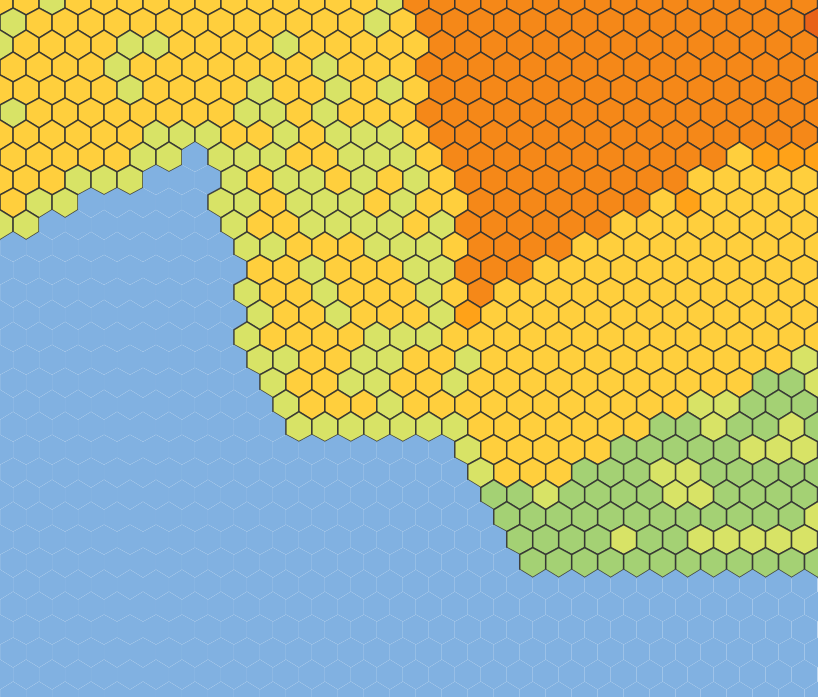

In [ ]:
demoTerr()

In [ ]:
from HexMagic.terrainpatterns import TerrainPatterns
from HexMagic.climate import TerrainFactory

## Climate

Initial seeds: 25 (spacing=11)
After elimination: 18
Final unique seeds: 18


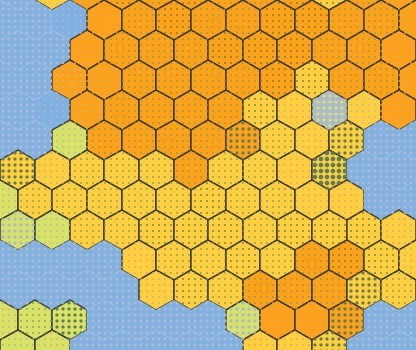

In [ ]:


def island_demo_fixed(debug=False):
    """Create a tropical island with three volcanoes and downsampled rivers."""
    
    # 1. Create blank ocean world with tropical preset
    bounds = MapRect(MapCord(0, 0), MapSize(800, 800))
    terrain , plates = TerrainFactory.create_ocean_world(
        bounds=bounds,
        preset='tropical',
        radius=15,
        lon_span=5.0,
        num_plates=16,
        debug = debug
    )
    if debug:
        print("\n=== COMPUTING CLIMATE ===")
    terrain.climate.configure(terrain,debug=debug)
    
    
    # 6. Visualize original
    if debug:
        print("\n=== RENDERING ORIGINAL ===")
    terrain.colorMap()
    terrain.hexGrid.update()
    terrain.add_climate_overlay()
    
    
    # 7. Downsample terrain (including flow)
    if debug:
        
        print("\n=== DOWNSAMPLING ===")
    smaller = terrain.downsample_climate(0.25)
    smaller.hexGrid.adjustRadius(20)
    
    # 9. Visualize downsampled version
    smaller.colorMap()
    smaller.hexGrid.update()
    smaller.add_climate_overlay()

    return smaller

isf = island_demo_fixed()
isf.colorMap
isf.hexGrid.update()
isf.hexGrid.builder.show()

